This notebook contains analysis on data set of 'Ultimate Technologies Inc' company. UTI is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

Dataset consists of activitie and profile details of driviers. Where we need to predict driver's retension for the UTI account. Problem set consist of three parts as below :

<ul>
    <li> Exploratory data analysis</li>
    <li>Experiment and metricd design</li>
    <li>Predictive Modelling</li>
    </ul>


Load Python Packages

In [1]:
import os
import pandas as pd
import datetime as dt
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt 
import numpy as np

<B>part 1: Exploratory data analysis </B>
<img src = "Figures/Part1_Problem.png">

Load Dataset and check sample data

In [2]:
df = pd.read_json('Data/logins.json')
ts=df.resample('15T', on='login_time').count()
ts.columns = ['counts']
ts.reset_index(inplace = True)
ts.head()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Get Date, Time and Month in separate column

In [3]:
ts['Date'] = ts.login_time.dt.date
ts['Time'] = ts.login_time.dt.time
ts['Month'] = ts.login_time.dt.month

ts.head()

,login_time,counts,Date,Time,Month
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00,1
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00,1
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00,1
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00,1
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00,1


Get the average of over all login counts group by time 

In [4]:
df_over_all = ts.groupby(['Time']).agg({'counts':'mean'}).reset_index().set_index('Time')
df_over_all.head()

,counts
Time,
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275


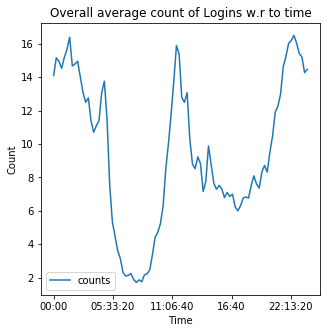

In [5]:
df_over_all.plot(figsize =(5,5))
plt.ylabel('Count')
plt.title('Overall average count of Logins w.r to time')
plt.legend()
plt.show()

From above graph we 3 major sipkes in graphs. It seems user login activity is high at 1:00 AM and 11:00 AM in morning and 10:00 PM in night

Now we have only analyszed activity from the overall data we have. It would be intresting if we cross check data month wise and see if same behaviour is repeated over months

In [6]:
df_month_wise = ts.groupby(['Month','Time']).agg({'counts':'mean'}).reset_index().set_index('Time')
df_month_wise.head()

,Month,counts
Time,,
00:00:00,1,10.433333
00:15:00,1,12.033333
00:30:00,1,11.300000
00:45:00,1,12.400000
01:00:00,1,11.433333


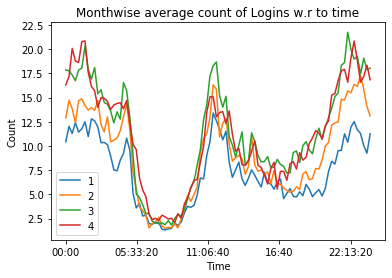

In [7]:
for i in df_month_wise.Month.unique():
    y = df_month_wise[df_month_wise.Month==i]['counts']
    y.plot(label = i)
plt.ylabel('Count')
plt.title('Monthwise average count of Logins w.r to time')
plt.legend()
plt.show()

There is bit difference between login activities for month of January and month of April. But we see similar spikes for all the months.Hence we can conclude, user login activity is high at 1:00 AM and 11:00 AM in morning and 10:00 PM in night

<img src = "Figures/Part2_Problem.png">

__Answers :__

1. Trips per week and revenue generated per hour could be a good measure. From business point of view revenue generated could be a compelling factor to convince drivers.

2. a. Pick x drivers with half group being local to one city and other open to all cities. And compare their revenue generated.
   
   b. ANOVA Test could be used as it compares categorical values(driver groups) and continuous values(revenue generated).
   
   c. Having a NULL hypothesis that both group generate same revenue. And alternative hypothesis that there is a difference. And we want to reject the NULL Hypothesis

<img src = "Figures/Part3_Problem.png">

Load Dataset and check sample data

In [8]:
udc_df = pd.read_json('Data/ultimate_data_challenge.json')
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


Above sample data looks like, we have categorical features like city, phone, ultimate_black_user rest of the features seems to be with continuous valuses. 

Get Data Description

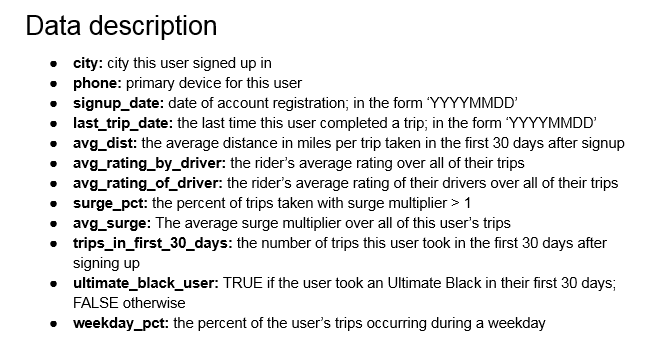

In [9]:
Image(filename='Figures/Data_Description.png') 

Get basic info about the data/features

In [10]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


<ul>
    <li>We have 50k rows with 12 columns </li>
    <li>For features 'avg_rating_of_driver','phone' and 'avg_rating_by_driver' we have null values present</li>
    <li>Date features are available is object data type</li>
    <li>Categorical feature are also available in object data types</li>
    <li> Rest of features with continuous values are with float or ineteger</li>
</ul>

Hence, I think I will have to look for date features. Either convert their type or separate their values into diffrent feature for year, month and date.    

Check count of NA values

In [11]:
udc_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

To deal with NULL values we will have to check data distribution of these features

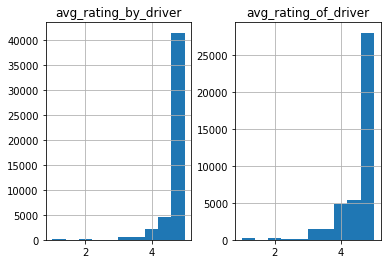

In [12]:
udc_df[['avg_rating_of_driver','avg_rating_by_driver']].hist()
plt.show()

In [13]:
#Medain as data is skwed
udc_df['avg_rating_of_driver'].fillna(value = udc_df['avg_rating_of_driver'].median(), inplace = True)
udc_df['avg_rating_by_driver'].fillna(value = udc_df['avg_rating_by_driver'].median(), inplace = True)

udc_df['phone'].fillna(value = udc_df['phone'].mode(), inplace = True)

Duplicate Data : We will drop  duplicate data as having exact same values for such dataset is not expected 

In [14]:
#check for duplicate data
udc_df[udc_df.duplicated()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
29601,Winterfell,1,2014-01-01,4.9,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0
34641,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
36627,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
39601,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
42025,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
45416,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0


In [15]:
udc_df.drop_duplicates(inplace = True)
udc_df[udc_df.duplicated()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [16]:
udc_df['last_trip_date'] = pd.to_datetime(udc_df['last_trip_date']) 
udc_df['signup_date'] = pd.to_datetime(udc_df['signup_date']) 

## EDA

If you look closely, 'ultimate_black_user' can be our target variable.

In [17]:
x = udc_df['last_trip_date'] - udc_df['signup_date']
udc_df['cust_days'] = x.dt.components.days

In [18]:
continuous_var = ['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']

cat_var = ['city','phone']

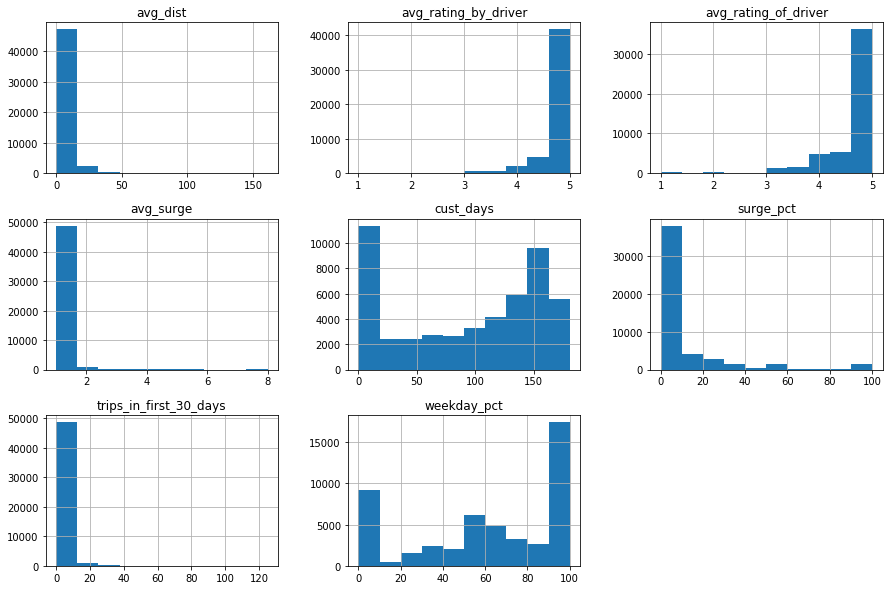

In [19]:
udc_df[continuous_var].hist(figsize = (15,10))
plt.show()

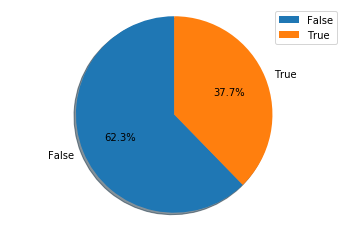

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(list(udc_df.ultimate_black_user.value_counts()), labels= ['False','True'],autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.legend()
plt.show()

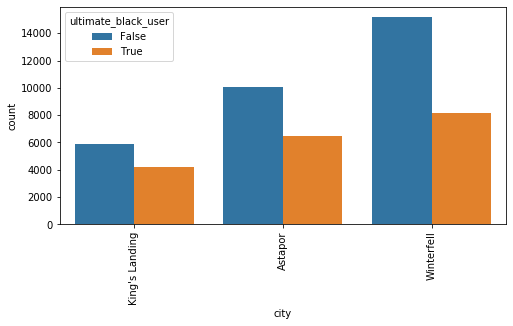

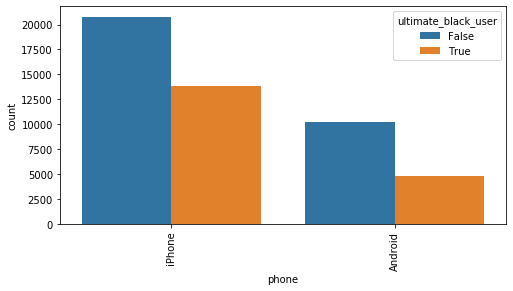

In [21]:
for i in cat_var:
    plt.figure(figsize=(8,4))
    sns.countplot(data = udc_df,hue = 'ultimate_black_user', x = i)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
df = udc_df[['signup_date']]
df['count'] = 1
df.set_index('signup_date', inplace = True)
df.head()

C:\Users\Pranay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count
signup_date,
2014-01-25,1
2014-01-29,1
2014-01-06,1
2014-01-10,1
2014-01-27,1


In [23]:
df_day = df.resample('D').sum()
df_day.head()

,count
signup_date,
2014-01-01,1736
2014-01-02,1004
2014-01-03,1213
2014-01-04,1485
2014-01-05,1343


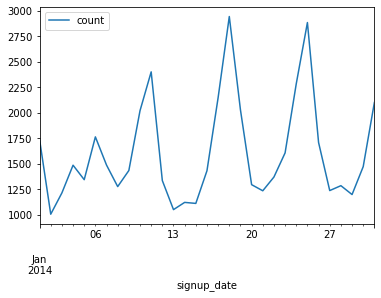

In [24]:
df_day.plot()
plt.show()

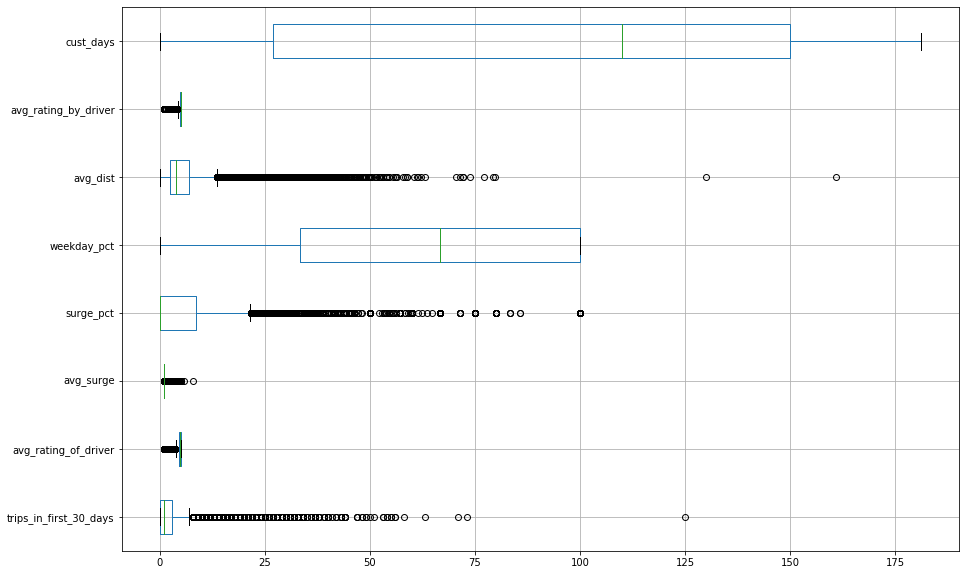

In [25]:
#Dealing with outliers

udc_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

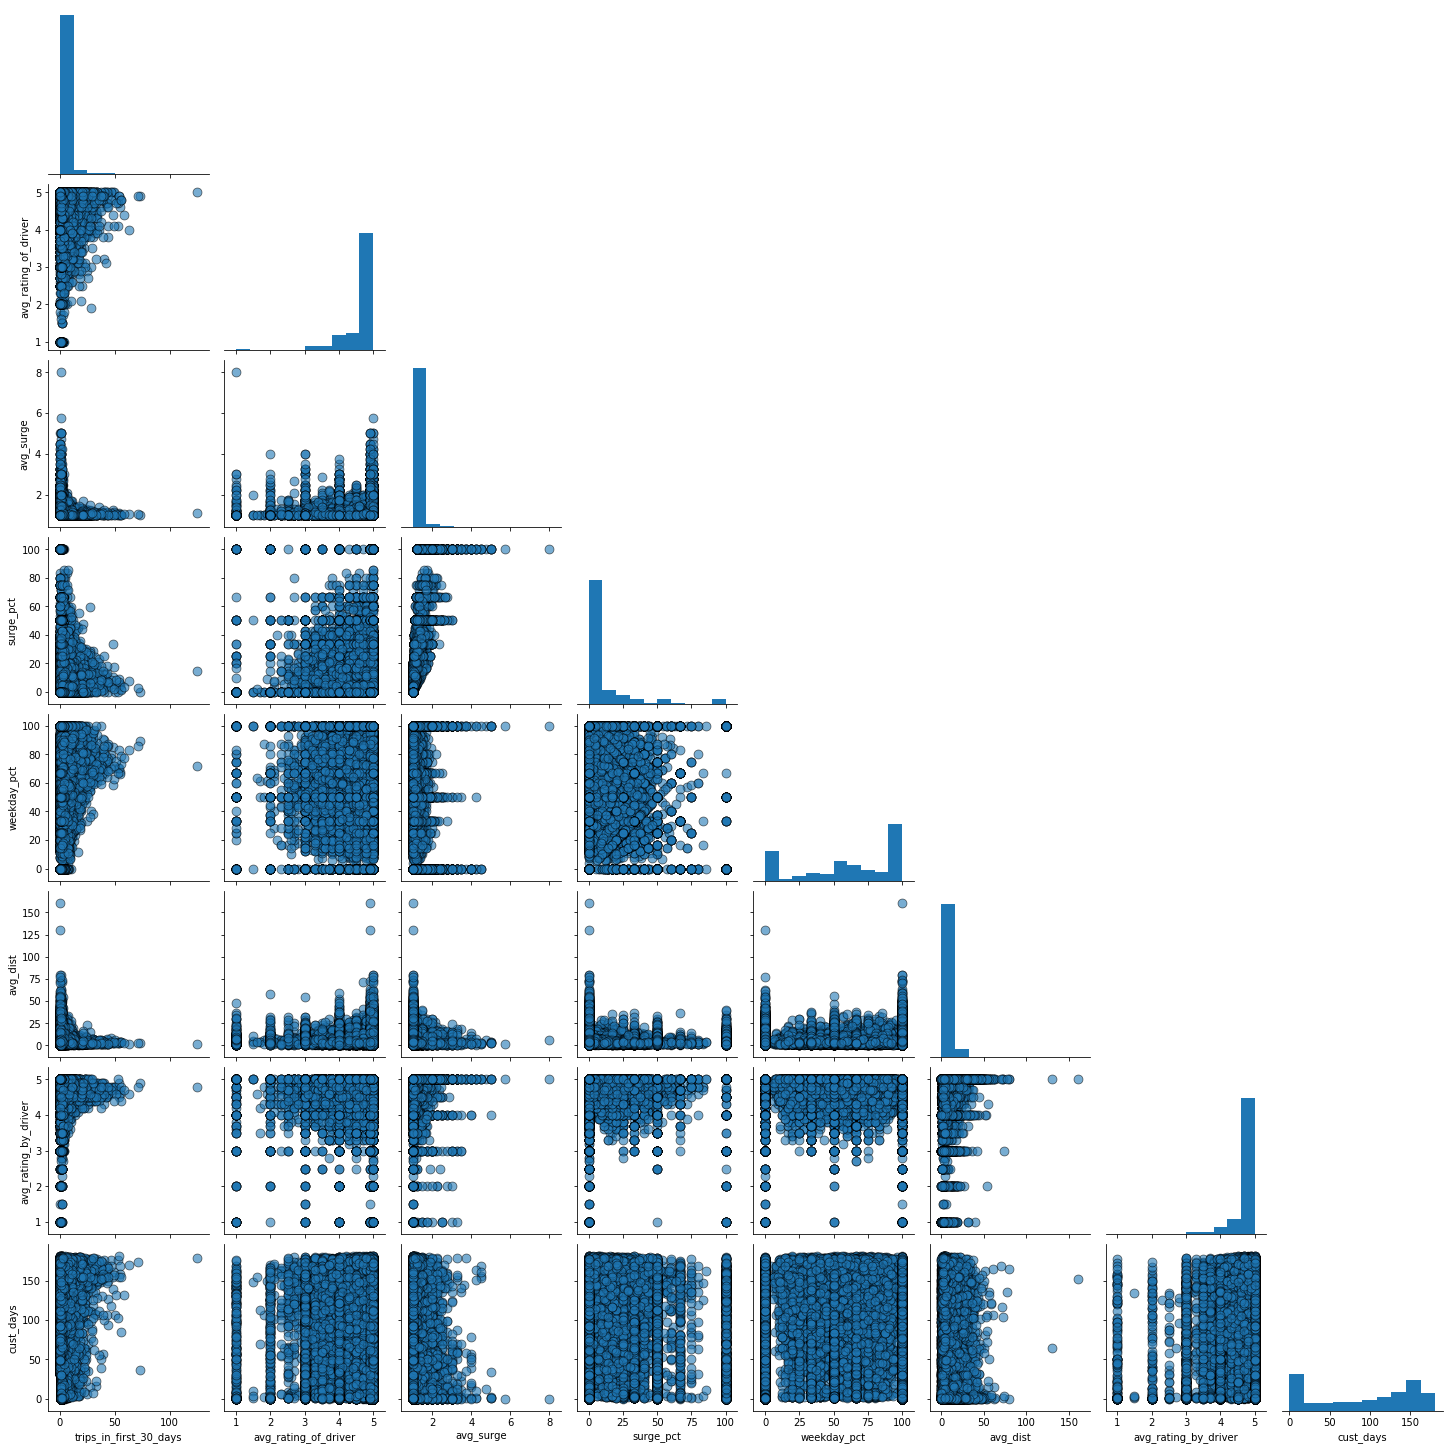

In [26]:
sns.pairplot(data = udc_df
            ,vars =  ['trips_in_first_30_days', 'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
                 ,corner=True)
plt.show()

In [27]:
for i in continuous_var:
    print(i ,udc_df[i].skew())

trips_in_first_30_days 5.167326688978298
avg_rating_of_driver -2.739672544088061
avg_surge 6.820830288531048
surge_pct 3.1438218651562124
weekday_pct -0.4779203897837433
avg_dist 3.4640931425063832
avg_rating_by_driver -4.13628497577653
cust_days -0.32413320961703185


In [28]:
from scipy import stats

for i in ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','avg_dist','avg_rating_by_driver']:
    udc_df[i] = stats.yeojohnson(udc_df[i])[0]
    print(i,':',udc_df[i].skew())

trips_in_first_30_days : 0.10499984211477607
avg_rating_of_driver : -0.7776127836866646
avg_surge : 0.0
avg_dist : 0.009210535947571142
avg_rating_by_driver : -0.8563356992774053


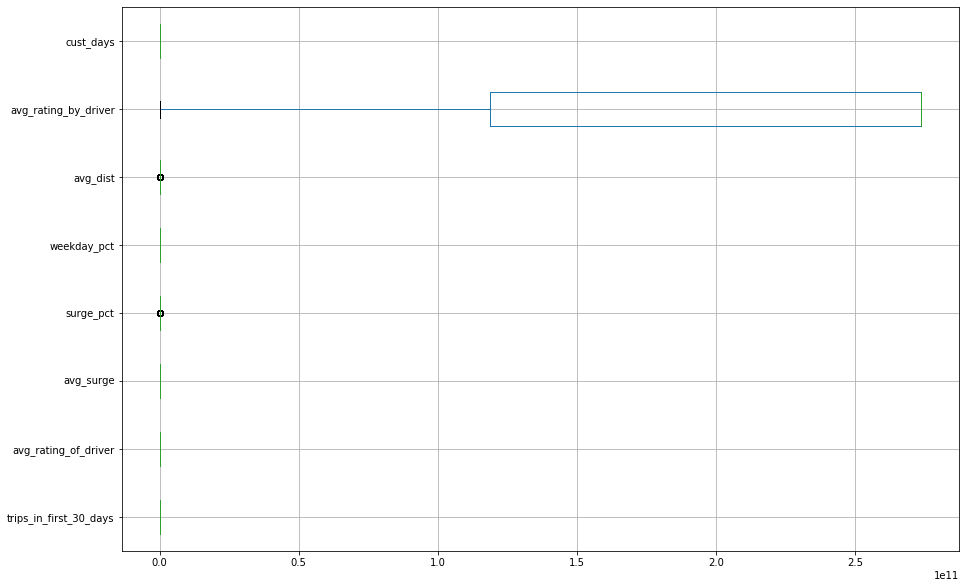

In [29]:
udc_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

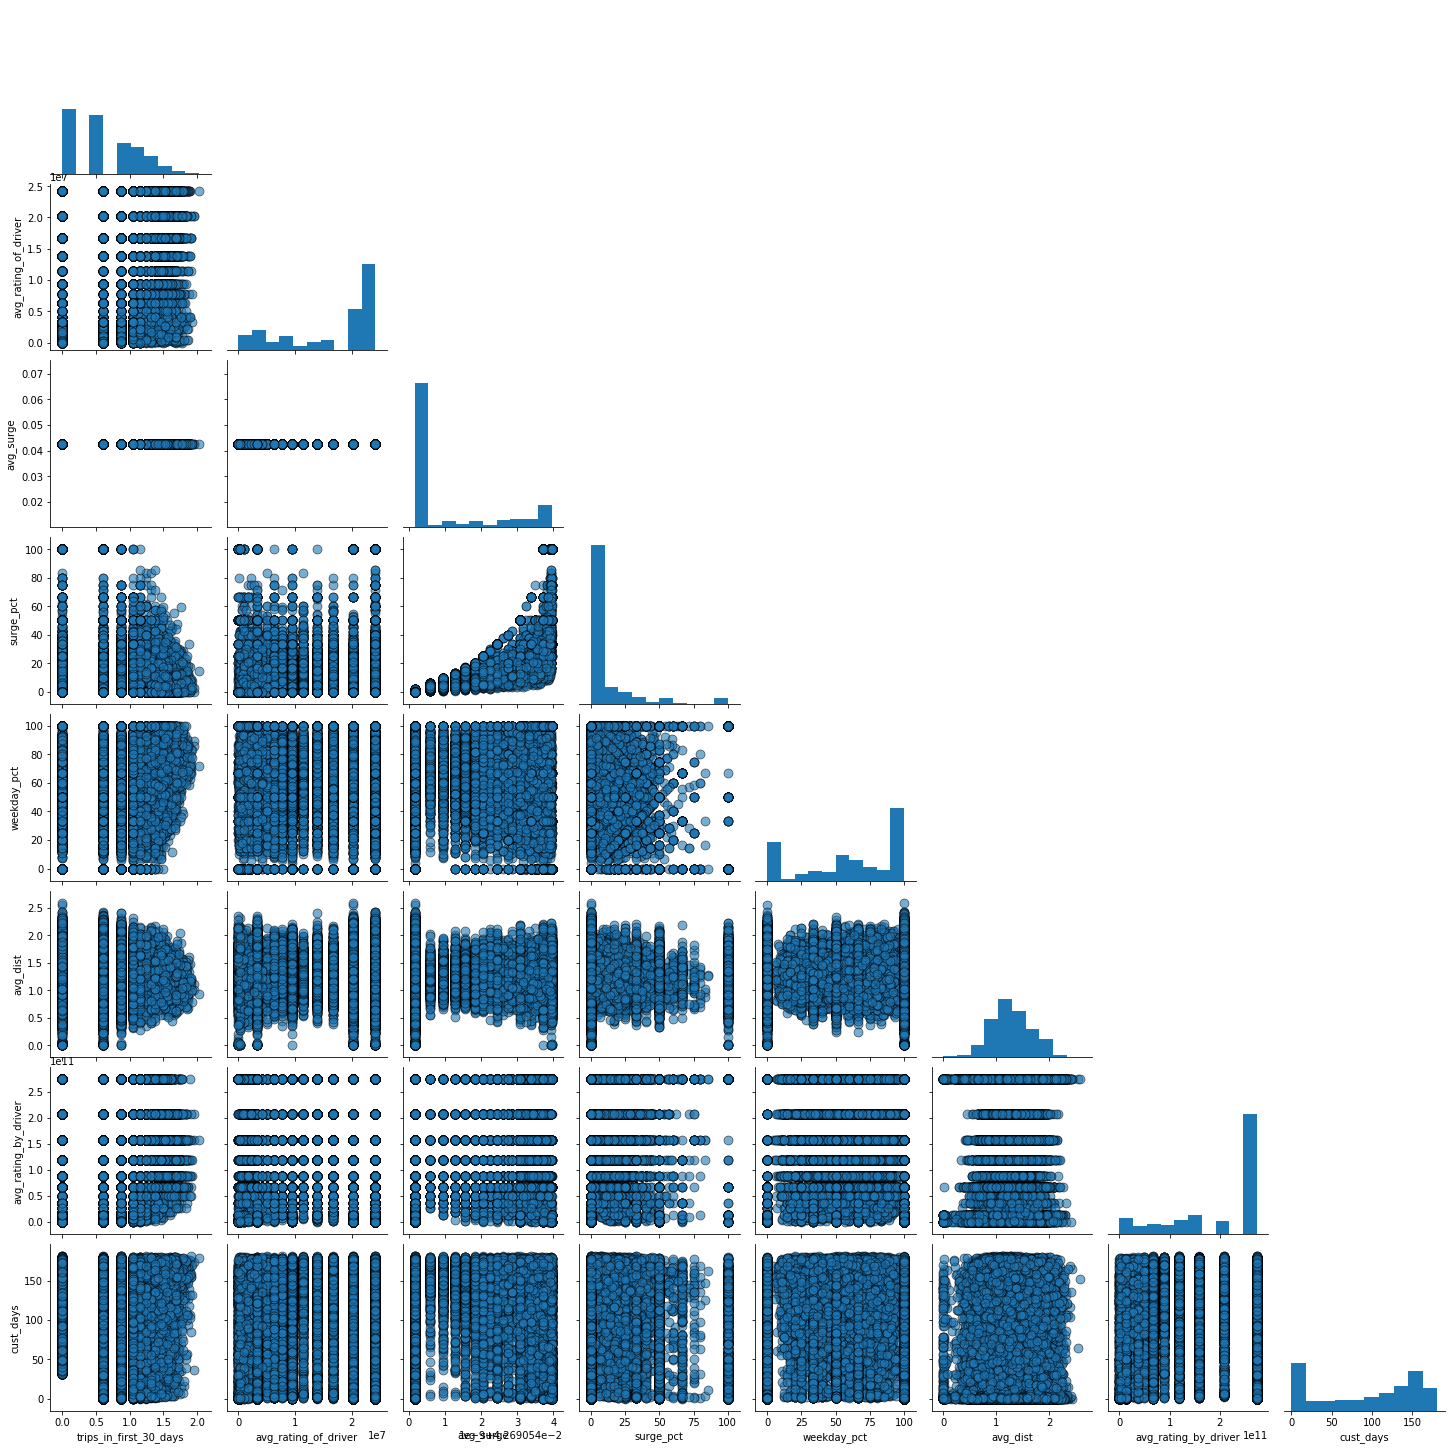

In [30]:
sns.pairplot(data = udc_df
            ,vars =  ['trips_in_first_30_days', 'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
                 ,corner=True)
plt.show()

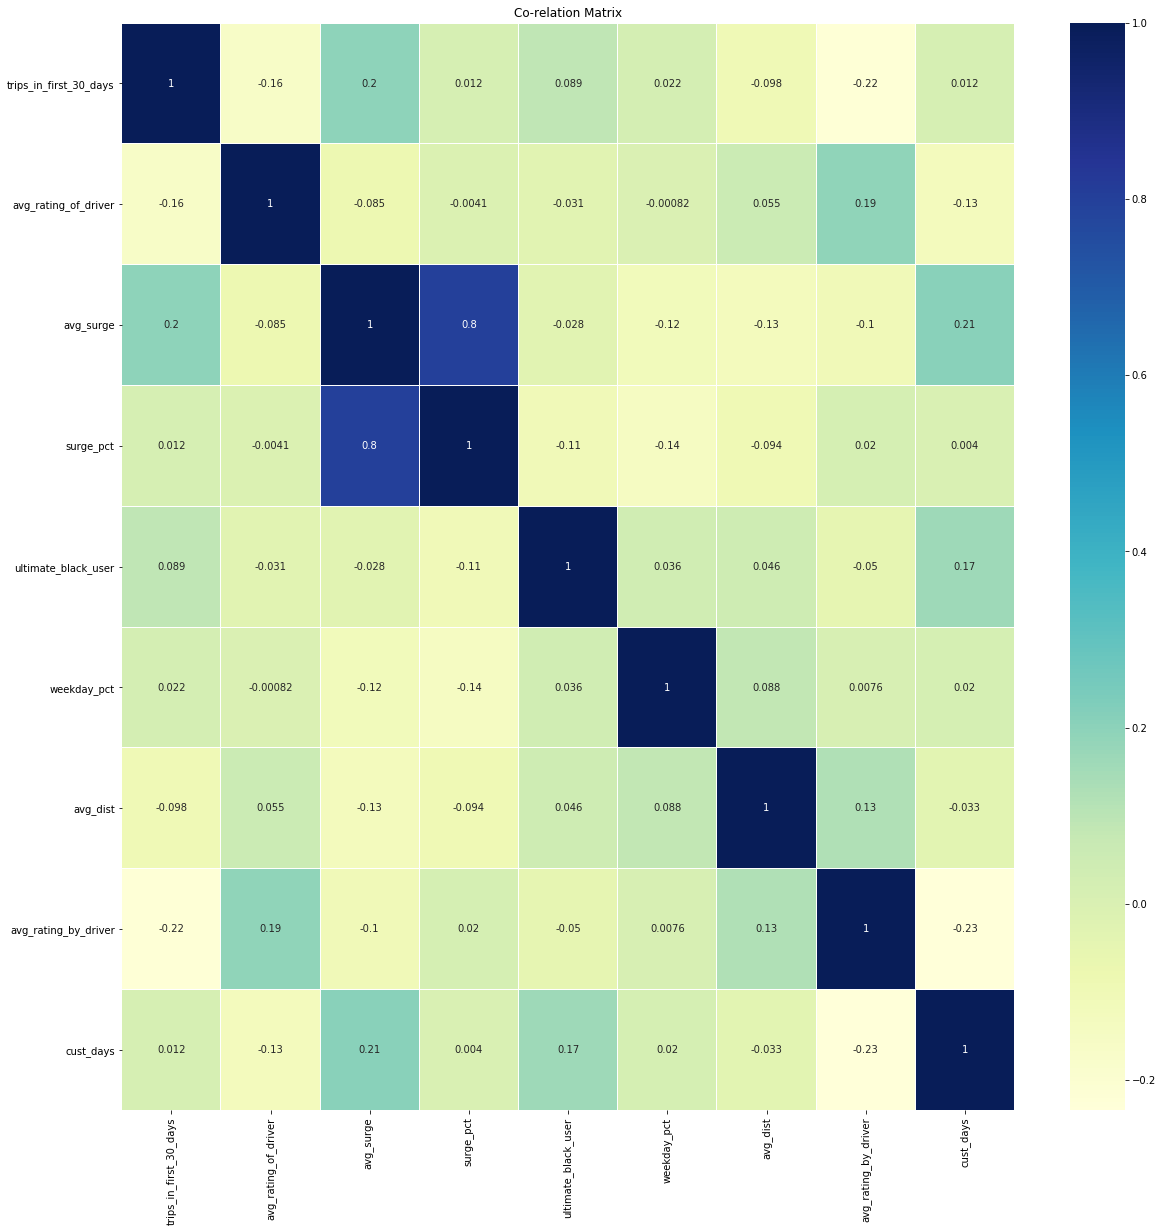

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(udc_df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.title('Co-relation Matrix')
plt.show()

avg_surge and surge_pct are highly co-related.

## Data Pre-Processing

In [32]:
#One hot encoding
for col in cat_var:
    udc_df = pd.concat([udc_df.drop(col, axis = 1),pd.get_dummies(udc_df[col],prefix = col)],axis = 1)

print(udc_df.columns)

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'cust_days',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')


In [33]:
#train test split
from sklearn.model_selection import train_test_split

X = udc_df.drop(['ultimate_black_user','surge_pct','signup_date','last_trip_date'],axis = 1)
y = udc_df['ultimate_black_user']

feature_lst = X.columns
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.30,random_state = 46)

## Modelling

In [34]:
score_df = pd.DataFrame(columns = ['Algorithm','Train_Score','Test_Score'])

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

def cross_validate(model,X,y):
    
    scr = []
    kfold = KFold(3, shuffle = True,random_state = 40)
    # enumerate splits
    for train, test in kfold.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        scr.append(precision_score(y_test, y_pred, average='macro'))
        
    print('Train Score: ',np.mean(scr))
    
    try:
        y_pred = model.predict(X_val)
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
        
    except:
        y_pred = model.predict(X_val.drop('customer_affinity_score',axis = 1))
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
    return np.mean(scr),val_scr, model

In [36]:
from sklearn.linear_model import LogisticRegression

algo = 'Logistic Regression'

LogReg = LogisticRegression()
tr_scr, tst_scr, LogReg = cross_validate(LogReg,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Score:  0.31073895207643815
Test Score:  0.31314175223363117


C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.tree import DecisionTreeClassifier

algo = 'Decision Tree'

DTClf = DecisionTreeClassifier()
tr_scr, tst_scr, DTClf = cross_validate(DTClf,X_train,y_train)
score_df = score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.5293977138573956
Test Score:  0.5280416085306587


In [38]:
from sklearn.ensemble import RandomForestClassifier

algo = 'Random Forest Classifier'

RFClf = RandomForestClassifier()
tr_scr, tst_scr, RFClf = cross_validate(RFClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.5696533217608079
Test Score:  0.5773874230659243


In [39]:
from xgboost import XGBClassifier

algo = 'XG Boost'

XGBClf = XGBClassifier()
tr_scr, tst_scr, XGBClf = cross_validate(XGBClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.6237261633343563
Test Score:  0.6187985604203607


In [40]:
from sklearn.svm import SVC

algo = 'SVM'

SVMClf = SVC(kernel = 'linear')
tr_scr, tst_scr, SVMClf = cross_validate(SVMClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.6319912234248677
Test Score:  0.591264395595158


In [41]:
score_df

,Algorithm,Train_Score,Test_Score
0,Logistic Regression,0.310739,0.313142
1,Decision Tree,0.529398,0.528042
2,Random Forest Classifier,0.569653,0.577387
3,XG Boost,0.623726,0.618799
4,SVM,0.631991,0.591264


In [42]:
features = list(X.columns)
coef = SVMClf.coef_[0]

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.00
avg_rating_of_driver :  0.00
avg_surge :  -0.00
weekday_pct :  0.00
avg_dist :  -0.00
avg_rating_by_driver :  -0.00
cust_days :  0.00
city_Astapor :  0.00
city_King's Landing :  -0.00
city_Winterfell :  -0.00
phone_Android :  -2.00
phone_iPhone :  -2.00


Looking at SVM's coefficient phone os time seems to be an important parameter. But this model might be overfitting as Test score is lower.

In [43]:
features = list(X.columns)
coef = LogReg.coef_[0]

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.24
avg_rating_of_driver :  -0.00
avg_surge :  -0.21
weekday_pct :  0.04
avg_dist :  0.12
avg_rating_by_driver :  -0.01
cust_days :  0.38
city_Astapor :  0.28
city_King's Landing :  0.13
city_Winterfell :  -0.03
phone_Android :  -1.13
phone_iPhone :  -0.95


Again Phone seems to be an important parameter. 'cust_days' is another important feature, it's a new feature stating how old the customer is. City is also an important feature. 'trips_in_first_30_days' number of trips in past 30 days.
'avg_surge' is also an important feature.

In [44]:
features = list(X.columns)
coef = DTClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.06
avg_rating_of_driver :  0.08
avg_surge :  0.06
weekday_pct :  0.11
avg_dist :  0.34
avg_rating_by_driver :  0.07
cust_days :  0.22
city_Astapor :  0.01
city_King's Landing :  0.01
city_Winterfell :  0.01
phone_Android :  0.02
phone_iPhone :  0.02


In [45]:
features = list(X.columns)
coef = RFClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.08
avg_rating_of_driver :  0.09
avg_surge :  0.07
weekday_pct :  0.10
avg_dist :  0.31
avg_rating_by_driver :  0.06
cust_days :  0.24
city_Astapor :  0.01
city_King's Landing :  0.01
city_Winterfell :  0.01
phone_Android :  0.01
phone_iPhone :  0.01


In [46]:
features = list(X.columns)
coef = XGBClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.09
avg_rating_of_driver :  0.06
avg_surge :  0.09
weekday_pct :  0.07
avg_dist :  0.07
avg_rating_by_driver :  0.07
cust_days :  0.12
city_Astapor :  0.11
city_King's Landing :  0.07
city_Winterfell :  0.07
phone_Android :  0.06
phone_iPhone :  0.12


cust_days, phone, city seem to be impotant criterias.

Also, we need more features such as customer demography, job, age etc.

And customer activity in past few weeks can also help.

And more data is also required.